## Dive into Deep Learning 5.2.4

In [15]:
import torch
from torch import nn
from d2l import torch as d2l
from torch.nn import functional as F
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [16]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

In [17]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [18]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

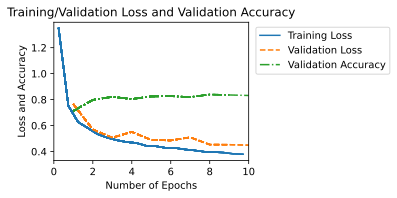

In [19]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

plt.title('Training/Validation Loss and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss and Accuracy')

legend_labels = ['Training Loss', 'Validation Loss', 'Validation Accuracy']
legend_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
legend_handles = [
    Line2D([0], [0], linestyle='-', color=legend_colors[0]),
    Line2D([0], [0], linestyle='--', color=legend_colors[1]),
    Line2D([0], [0], linestyle='-.', color=legend_colors[2])
]
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.75, 1), loc='upper right')
plt.show()

In [20]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

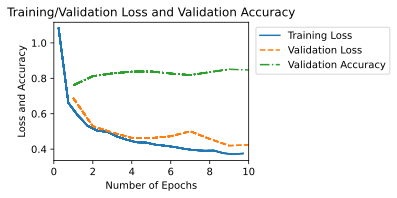

In [21]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

plt.title('Training/Validation Loss and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss and Accuracy')

legend_labels = ['Training Loss', 'Validation Loss', 'Validation Accuracy']
legend_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
legend_handles = [
    Line2D([0], [0], linestyle='-', color=legend_colors[0]),
    Line2D([0], [0], linestyle='--', color=legend_colors[1]),
    Line2D([0], [0], linestyle='-.', color=legend_colors[2])
]
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.75, 1), loc='upper right')
plt.show()

### 5.2.4 Exercise 1
#### Change the number of hidden units num_hiddens and plot how its number affects the accuracy of the model. What is the best value of this hyperparameter?

num_hiddens: 512, Validation Accuracy: 0.8515625

Best num_hiddens: 64, Best Validation Accuracy: 0.85849609375


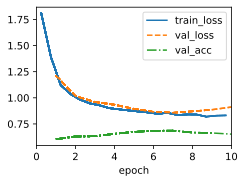

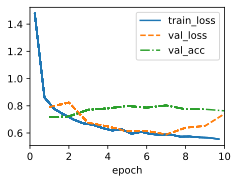

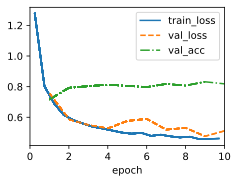

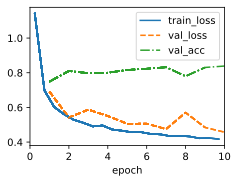

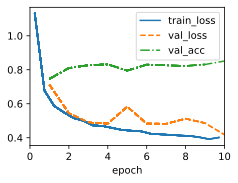

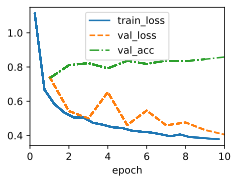

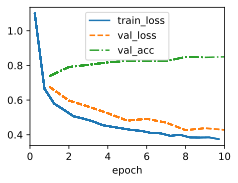

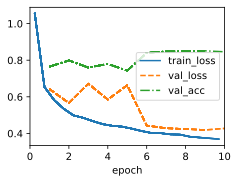

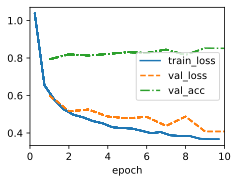

In [30]:
import numpy as np

# Define a function to train and evaluate the model for a given num_hiddens value
def train_and_evaluate(num_hiddens):
    model = MLP(num_outputs=10, num_hiddens=num_hiddens, lr=0.1)
    trainer.fit(model, data)
    val_acc = model.board.data['val_acc'][-1].y
    return val_acc

# Define the range of num_hiddens values to test
num_hiddens_values = [2, 4, 8, 16, 32, 64, 128, 256, 512]

# Initialize a list to store validation accuracies
val_accuracies = []

# Train and evaluate the model for each num_hiddens value
for num_hiddens in num_hiddens_values:
    val_acc = train_and_evaluate(num_hiddens)
    val_accuracies.append(val_acc)
    print(f"num_hiddens: {num_hiddens},", f"Validation Accuracy: {val_acc}")

# Find the best num_hiddens value
best_num_hiddens = num_hiddens_values[np.argmax(val_accuracies)]
best_accuracy = max(val_accuracies)
print('')
print(f"Best num_hiddens: {best_num_hiddens},", f"Best Validation Accuracy: {best_accuracy}")

### 5.2.4 Exercise 2
#### Try adding a hidden layer to see how it affects the results.

In [23]:
class MLP_one_more_hidden_layer(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

class MLP_two_more_hidden_layer(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

class MLP_three_more_hidden_layer(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

def train_and_evaluate_one_more_hidden_layer(num_hiddens):
    model = MLP_one_more_hidden_layer(num_outputs=10, num_hiddens=num_hiddens, lr=0.1)
    trainer.fit(model, data)
    val_acc = model.board.data['val_acc'][-1].y
    return val_acc

def train_and_evaluate_two_more_hidden_layer(num_hiddens):
    model = MLP_two_more_hidden_layer(num_outputs=10, num_hiddens=num_hiddens, lr=0.1)
    trainer.fit(model, data)
    val_acc = model.board.data['val_acc'][-1].y
    return val_acc

def train_and_evaluate_three_more_hidden_layer(num_hiddens):
    model = MLP_three_more_hidden_layer(num_outputs=10, num_hiddens=num_hiddens, lr=0.1)
    trainer.fit(model, data)
    val_acc = model.board.data['val_acc'][-1].y
    return val_acc

The existing MLP (one hidden layer) accuracy: 0.85869140625


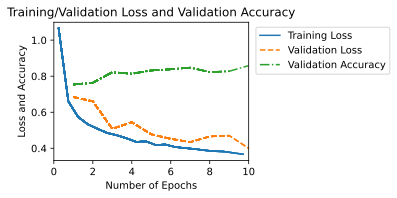

In [24]:
print(f"The existing MLP (one hidden layer) accuracy: {train_and_evaluate(256)}")
plt.title('Training/Validation Loss and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss and Accuracy')

legend_labels = ['Training Loss', 'Validation Loss', 'Validation Accuracy']
legend_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
legend_handles = [
    Line2D([0], [0], linestyle='-', color=legend_colors[0]),
    Line2D([0], [0], linestyle='--', color=legend_colors[1]),
    Line2D([0], [0], linestyle='-.', color=legend_colors[2])
]
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.75, 1), loc='upper right')
plt.show()

MLP (with one more hidden layer added) accuracy: 0.86533203125


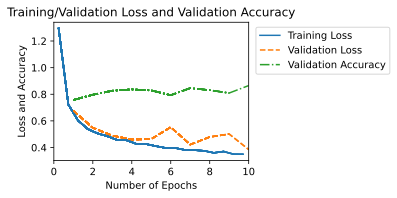

In [25]:
print(f"MLP (with one more hidden layer added) accuracy: {train_and_evaluate_one_more_hidden_layer(256)}")
plt.title('Training/Validation Loss and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss and Accuracy')

legend_labels = ['Training Loss', 'Validation Loss', 'Validation Accuracy']
legend_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
legend_handles = [
    Line2D([0], [0], linestyle='-', color=legend_colors[0]),
    Line2D([0], [0], linestyle='--', color=legend_colors[1]),
    Line2D([0], [0], linestyle='-.', color=legend_colors[2])
]
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.75, 1), loc='upper right')
plt.show()

MLP (with two more hidden layers added) accuracy: 0.8486328125


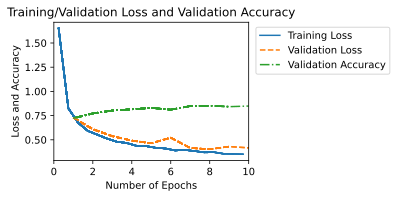

In [26]:
print(f"MLP (with two more hidden layers added) accuracy: {train_and_evaluate_two_more_hidden_layer(256)}")
plt.title('Training/Validation Loss and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss and Accuracy')

legend_labels = ['Training Loss', 'Validation Loss', 'Validation Accuracy']
legend_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
legend_handles = [
    Line2D([0], [0], linestyle='-', color=legend_colors[0]),
    Line2D([0], [0], linestyle='--', color=legend_colors[1]),
    Line2D([0], [0], linestyle='-.', color=legend_colors[2])
]
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.75, 1), loc='upper right')
plt.show()

MLP (with three more hidden layers added) accuracy: 0.85498046875


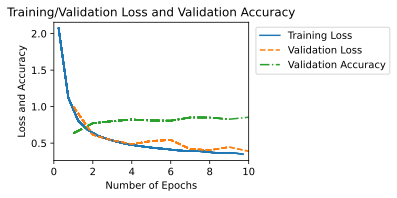

In [27]:
print(f"MLP (with three more hidden layers added) accuracy: {train_and_evaluate_three_more_hidden_layer(256)}")
plt.title('Training/Validation Loss and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss and Accuracy')

legend_labels = ['Training Loss', 'Validation Loss', 'Validation Accuracy']
legend_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
legend_handles = [
    Line2D([0], [0], linestyle='-', color=legend_colors[0]),
    Line2D([0], [0], linestyle='--', color=legend_colors[1]),
    Line2D([0], [0], linestyle='-.', color=legend_colors[2])
]
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.75, 1), loc='upper right')
plt.show()

> In this experiment, I have found that the higest validation accuracy was achieved when I add just one more hidden layer to the existing MLP model architecture.

### 5.2.4 Exercise 3
#### Why is it a bad idea to insert a hidden layer with a single neuron? What could go wrong?

> If a hidden layer has one signle neuron, it is likely that the model would not be able to learn a sufficient amount of information embedded in the dataset through that layer. This is because a single neuron cannot have enough power of feature representation with regard to underlying complex data.

### 5.2.4 Exercise 4
#### How does changing the learning rate alter your results? With all other parameters fixed, which learning rate gives you the best results? How does this relate to the number of epochs?

Learning Rate: 0.1, Validation Accuracy: 0.8505859375

Best Learning Rate: 0.1,Best Validation Accuracy: 0.8505859375


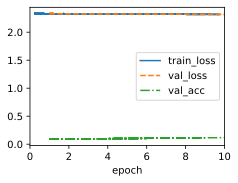

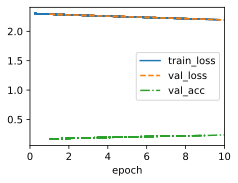

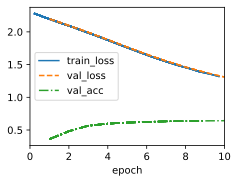

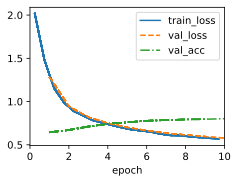

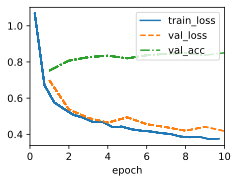

In [28]:
import matplotlib.pyplot as plt

# Define a function to train and evaluate the model for a given learning rate
def train_and_evaluate_lr(learning_rate):
    model = MLP(num_outputs=10, num_hiddens=256, lr=learning_rate)
    trainer.fit(model, data)
    val_acc = model.board.data['val_acc'][-1].y
    return val_acc

# Define the range of learning rates to test
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]

# Initialize a list to store the test accuracies
val_accuracies_lr = []

# Train and evaluate the model for each learning rate
for lr in learning_rates:
    val_acc_lr = train_and_evaluate_lr(lr)
    val_accuracies_lr.append(val_acc_lr)
    print(f"Learning Rate: {lr},", f"Validation Accuracy: {val_acc_lr}")

# Find the best learning rate
best_learning_rate = learning_rates[np.argmax(val_accuracies_lr)]
best_accuracy_lr = max(val_accuracies_lr)
print('')
print(f"Best Learning Rate: {best_learning_rate}," f"Best Validation Accuracy: {best_accuracy_lr}")

> It is not true that a higher learning rate is always better or a lower learning rate is always worse. If a learning rate is too high, the model performance would be likely to fluctuate too much. In contrast, if a learning rate is too small, it would take a long time to see convergence. From this context,  we might need only a few number of epochs in the case of a high learning rate, whereas quite a few epochs would be required to observe convergence in the case of a small learning rate. Therefore, we need to find the optimal learning rate for each specific dataset through a repeated process of hyperparameter tuning.